## FASE 4: ADVANCED ANALYTICS & MODELING
   	Predictive Modeling
	• Race Winner Prediction: use qualifying results, historical performance
	• Championship Prediction: Season-long modeling
	• Lap Time Prediction: based on circuit characteristics

    Statistical Analysis
	• Hypothesis testing (era comparisons)
	• Regression analysis (performance factors)
	• Time series forecasting
	• Clustering analysis (driver/team similarities)
    
	Machine Learning Applications
	• Classification models (podium prediction)
	• Regression models (point prediction)
	• Clustering (driver/team archetypes)
	• Anomaly detection (unusual performances)




In [1]:
!pip install scikit-learn
!pip install statsmodels

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report,
    mean_squared_error, r2_score, confusion_matrix, mean_absolute_error
)

sns.set(style="whitegrid", font_scale=1.0)

# paths
PROC = "data/processed"
os.makedirs("results/models", exist_ok=True)

# load integrated features
df = pd.read_csv(os.path.join(PROC, "F1_Integrated_Features.csv"))
print(f"Loaded df: {df.shape}")
# quick cleaning: lower column names
df.columns = [c.lower() for c in df.columns]
df.head(2)


Loaded df: (26519, 60)


,resultid,raceid,driverid,constructorid,number_x,grid,position,positiontext,positionorder,points,laps,time_x,milliseconds,fastestlap,rank,fastestlaptime,fastestlapspeed,statusid,driverref,number_y,code,forename,surname,dob,nationality_x,url_driver_details,constructorref,name_x,nationality_y,url_team_details,year,round,circuitid,name_y,date,time_y,url_race_schedule,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitref,name,location,country,lat,lng,alt,url_track_information,finish_category,win_rate,podium_rate,avg_position,f1_era
0,1,18,1,1,22,1,1.0,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,win,0.302326,0.578488,3.568254,V8 Era
1,2,18,2,2,3,5,2.0,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,podium,0.000000,0.070652,8.355072,V8 Era


C:\Users\Hp\AppData\Local\Temp\ipykernel_23724\148088412.py:20: DtypeWarning: Columns (4,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
C:\Users\Hp\AppData\Local\Temp\ipykernel_23724\148088412.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


 Data cleaning selesai

 Race Winner Prediction
Accuracy: 1.0


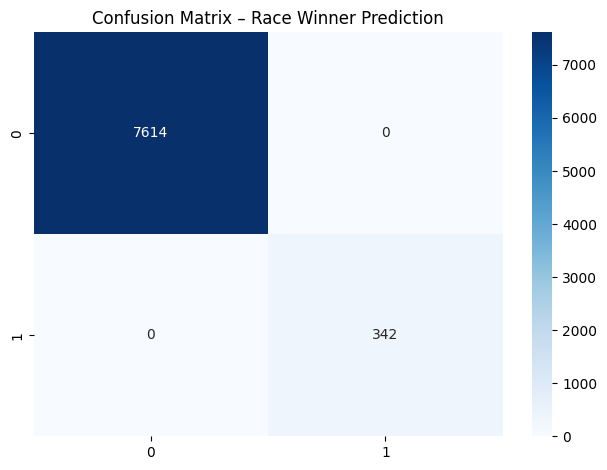


 Championship Prediction
Accuracy: 0.977


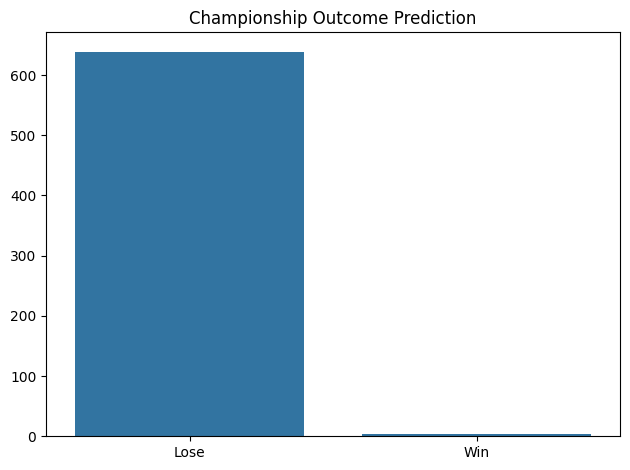


 Lap Time Prediction
R²: 0.338
MAE: 866204.45


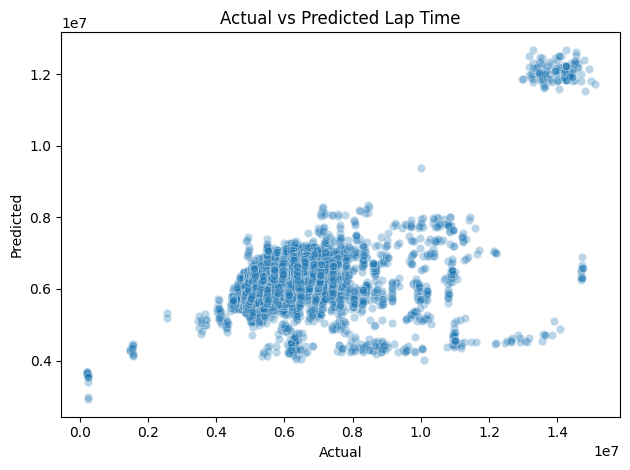

C:\Users\Hp\AppData\Local\Temp\ipykernel_23724\148088412.py:111: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_points = df.groupby('era')['points'].mean().reset_index()
C:\Users\Hp\AppData\Local\Temp\ipykernel_23724\148088412.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=era_points, x='era', y='points', palette='viridis')


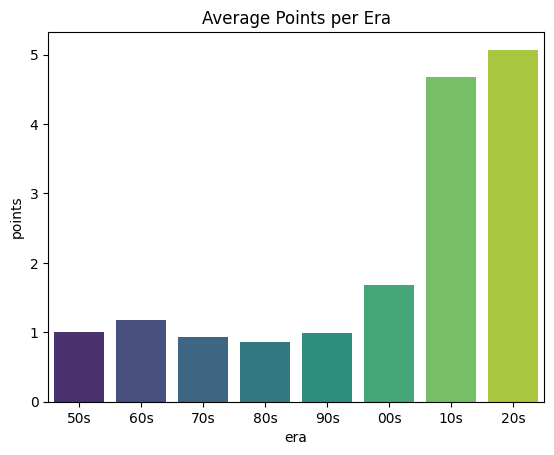

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     4334.
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:36:27   Log-Likelihood:                -69678.
No. Observations:               26519   AIC:                         1.394e+05
Df Residuals:                   26514   BIC:                         1.394e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5367      0.050     

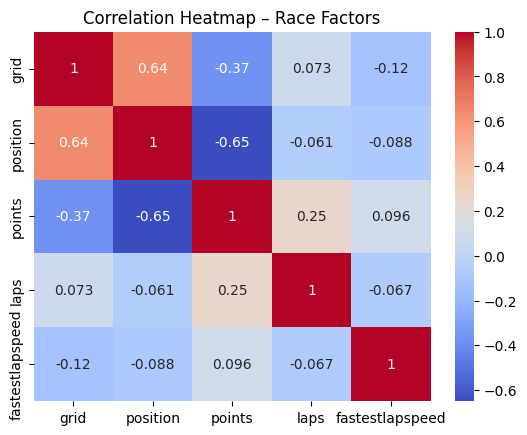

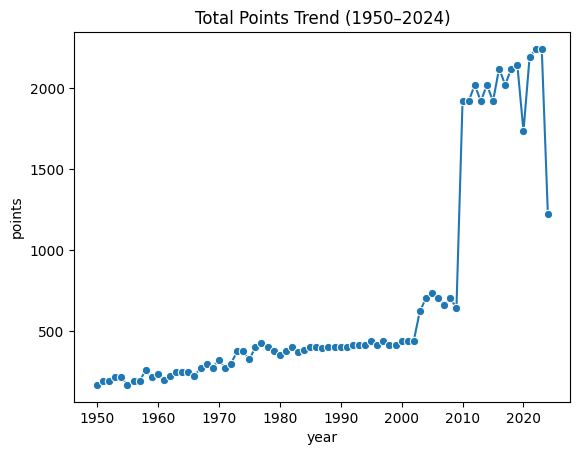

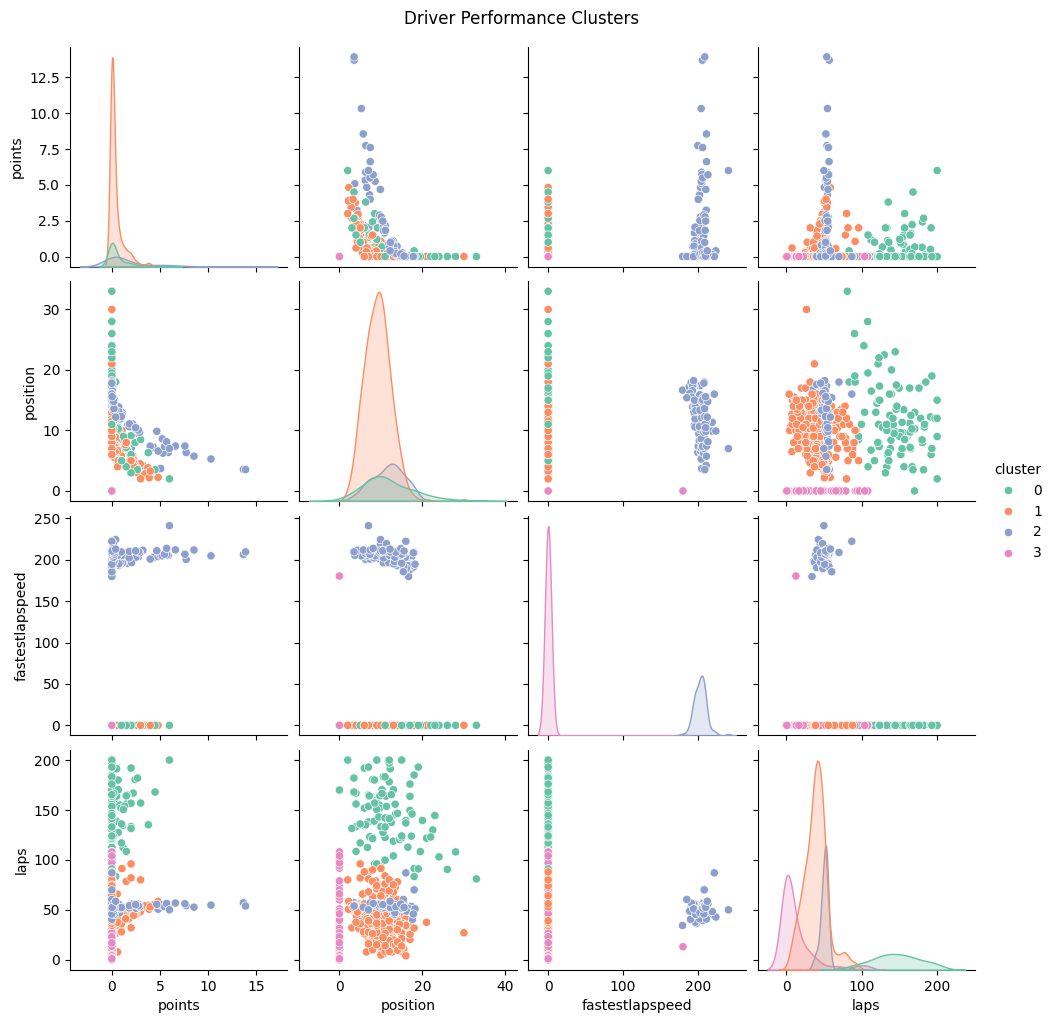


 All models and figures saved successfully in 'results/' folder.


In [ ]:

import os, joblib
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import KMeans


os.makedirs("results/models", exist_ok=True)
os.makedirs("results/figures", exist_ok=True)


df = pd.read_csv("data/processed/F1_Integrated_Features.csv")


# PREDICTIVE MODELING


## Race Winner Prediction
print("\n Race Winner Prediction")
df['win_flag'] = np.where(df['position'] == 1, 1, 0)
feature_cols = ['grid','points','fastestlapspeed','fastestlap','positionorder']
X = df[feature_cols].fillna(0); y = df['win_flag']

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)
model_win = LogisticRegression(max_iter=2000)
model_win.fit(Xtr, ytr)
ypred = model_win.predict(Xte)

print("Accuracy:", round(accuracy_score(yte, ypred), 3))
sns.heatmap(confusion_matrix(yte, ypred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Race Winner Prediction")
plt.tight_layout()
plt.savefig("results/figures/race_winner_confusion.png")
plt.show()
joblib.dump(model_win, "results/models/race_winner_logreg.joblib")

## Championship Prediction
print("\n Championship Prediction")
champ = df.groupby(['year','driverid'])['points'].sum().reset_index()
champ['champ_flag'] = champ.groupby('year')['points'].transform(lambda x: (x==x.max()).astype(int))

X = champ[['points']]; y = champ['champ_flag']
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
model_champ = LogisticRegression()
model_champ.fit(Xtr, ytr)
ypred = model_champ.predict(Xte)

print("Accuracy:", round(accuracy_score(yte, ypred), 3))
sns.barplot(x=['Lose','Win'], y=np.bincount(ypred))
plt.title("Championship Outcome Prediction")
plt.tight_layout()
plt.savefig("results/figures/championship_prediction.png")
plt.show()
joblib.dump(model_champ, "results/models/season_champion_logreg.joblib")

## Lap Time Prediction
print("\n Lap Time Prediction")
df_lap = None
if 'milliseconds' in df.columns:
    df_lap = df[['milliseconds','grid','position','points','laps']].dropna()
    y = df_lap['milliseconds']
elif 'time' in df.columns:
    df['time_num'] = pd.to_numeric(df['time'], errors='coerce')
    df_lap = df[['time_num','grid','position','points','laps']].dropna()
    y = df_lap['time_num']

if df_lap is not None:
    X = df_lap[['grid','position','points','laps']]
    model_lap = LinearRegression()
    model_lap.fit(X, y)
    preds = model_lap.predict(X)
    print("R²:", round(r2_score(y, preds), 3))
    print("MAE:", round(mean_absolute_error(y, preds), 3))
    sns.scatterplot(x=y, y=preds, alpha=0.3)
    plt.title("Actual vs Predicted Lap Time")
    plt.xlabel("Actual"); plt.ylabel("Predicted")
    plt.tight_layout()
    plt.savefig("results/figures/lap_time_prediction.png")
    plt.show()
    joblib.dump(model_lap, "results/models/lap_time_regression.joblib")
else:
    print(" No valid lap-time column found.")



# STATISTICAL ANALYSIS


## Era Comparison
df['era'] = pd.cut(df['year'],
    bins=[1950,1959,1969,1979,1989,1999,2009,2019,2024],
    labels=['50s','60s','70s','80s','90s','00s','10s','20s'])
era_points = df.groupby('era')['points'].mean().reset_index()
sns.barplot(data=era_points, x='era', y='points', palette='viridis')
plt.title("Average Points per Era")
plt.savefig("results/figures/era_points_avg.png")
plt.show()

## Regression Analysis
X = df[['grid','position','laps','fastestlapspeed']].apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(df['points'], errors='coerce').fillna(0)
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())
sns.heatmap(df[['grid','position','points','laps','fastestlapspeed']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap – Race Factors")
plt.savefig("results/figures/factors_correlation.png")
plt.show()
joblib.dump(ols_model, "results/models/race_points_ols.joblib")

## Time Series
yearly = df.groupby('year')['points'].sum().reset_index()
sns.lineplot(data=yearly, x='year', y='points', marker='o')
plt.title("Total Points Trend (1950–2024)")
plt.savefig("results/figures/total_points_trend.png")
plt.show()

## Clustering
driver_perf = df.groupby('driverid')[['points','position','fastestlapspeed','laps']].mean().fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(driver_perf)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
driver_perf['cluster'] = kmeans.fit_predict(X_scaled)
sns.pairplot(driver_perf, hue='cluster', palette='Set2')
plt.suptitle("Driver Performance Clusters", y=1.02)
plt.savefig("results/figures/driver_clusters.png")
plt.show()
joblib.dump(kmeans, "results/models/driver_kmeans.joblib")
joblib.dump(scaler, "results/models/driver_scaler.joblib")

print("\n All models and figures saved successfully in 'results/' folder.")


### Machine Learning Applications

In [3]:
!pip install scikit-learn xgboost shap matplotlib seaborn

In [4]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.05)

# ML libs
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest
from sklearn.metrics import (roc_auc_score, average_precision_score, precision_recall_fscore_support,
                             classification_report, confusion_matrix, accuracy_score,
                             mean_squared_error, r2_score, mean_absolute_error)
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# optional libs
try:
    import xgboost as xgb
    HAS_XGB = True
except Exception:
    HAS_XGB = False

try:
    import shap
    HAS_SHAP = True
except Exception:
    HAS_SHAP = False

print("xgboost available:", HAS_XGB, "shap available:", HAS_SHAP)


# === Folder setup ===
os.makedirs("results/models", exist_ok=True)
os.makedirs("results/figures", exist_ok=True)
os.makedirs("results/tables", exist_ok=True)

# === Load data ===
df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
df.replace(["\\N", "nan"], np.nan, inplace=True)
df.columns = [c.lower() for c in df.columns]
print(f"✅ Loaded dataset: {df.shape}")

# === Prepare features ===
data = df.copy()
for col in ['grid','position','points','year','round','fastestlapspeed','laps','milliseconds']:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# categorical identifiers
for c in ['driverref','constructorref','circuitref']:
    if c not in data.columns:
        data[c] = np.nan

# name for readability
if 'forename' in data.columns and 'surname' in data.columns:
    data['driver_name'] = data['forename'].fillna('') + ' ' + data['surname'].fillna('')
else:
    data['driver_name'] = data['driverref'].astype(str)

# === Targets ===
data['podium'] = np.where(data['position'] <= 3, 1, 0)
data['win'] = np.where(data['position'] == 1, 1, 0)

# === Numeric and categorical features ===
num_features = [c for c in ['grid','fastestlapspeed','laps','avg_position','win_rate','podium_rate','year','round','lat','lng','alt'] if c in data.columns]
cat_features = [c for c in ['constructorref','driverref','circuitref'] if c in data.columns]

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

xgboost available: True shap available: True


C:\Users\Hp\AppData\Local\Temp\ipykernel_23724\4245471354.py:44: DtypeWarning: Columns (4,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/processed/F1_Integrated_Features.csv")


✅ Loaded dataset: (26519, 60)
Numeric features: ['grid', 'fastestlapspeed', 'laps', 'avg_position', 'win_rate', 'podium_rate', 'year', 'round', 'lat', 'lng', 'alt']
Categorical features: ['constructorref', 'driverref', 'circuitref']



📊 Podium Prediction Report:
              precision    recall  f1-score   support

           0      0.947     0.961     0.954      4632
           1      0.700     0.626     0.661       672

    accuracy                          0.919      5304
   macro avg      0.824     0.794     0.808      5304
weighted avg      0.915     0.919     0.917      5304

ROC AUC: 0.948
PR AUC: 0.719


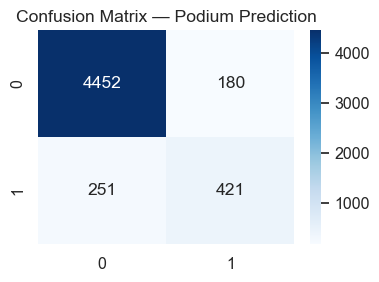

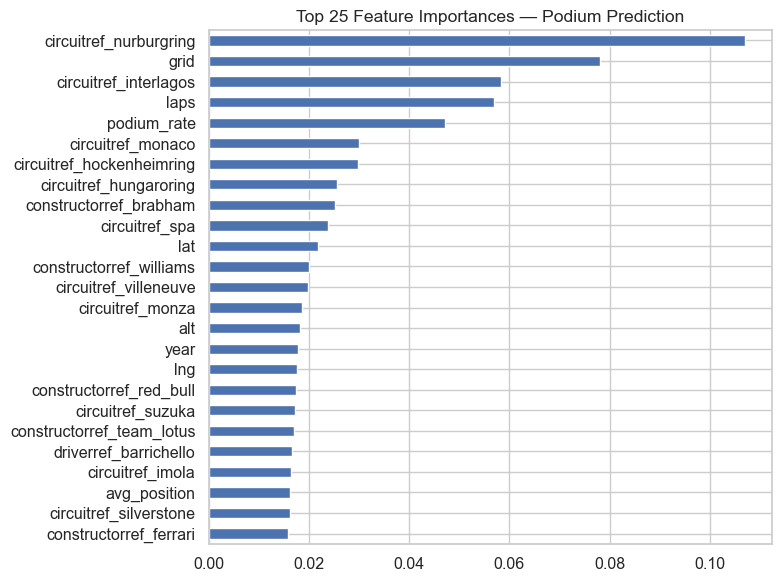

['results/models/podium_prediction_model.joblib']

In [ ]:

# PODIUM PREDICTION (Classification)

clf_df = data.dropna(subset=['podium']).copy()

def reduce_topk(series, k=12):
    top = series.value_counts().nlargest(k).index
    return series.where(series.isin(top), other='OTHER')

for c in cat_features:
    clf_df[c] = reduce_topk(clf_df[c].fillna('NA'), k=12)

X_num = clf_df[num_features].fillna(0)
X_cat = pd.get_dummies(clf_df[cat_features].fillna('NA'), prefix=cat_features, drop_first=True)
X = pd.concat([X_num, X_cat], axis=1)
y = clf_df['podium'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model_clf = xgb.XGBClassifier(n_estimators=300, max_depth=6, random_state=42, eval_metric='logloss') if HAS_XGB else RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced', n_jobs=-1)
model_clf.fit(X_train, y_train)

# Evaluation 
y_proba = model_clf.predict_proba(X_test)[:,1] if hasattr(model_clf, "predict_proba") else model_clf.predict(X_test)
y_pred = (y_proba >= 0.5).astype(int)

print("\n📊 Podium Prediction Report:")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))
print("PR AUC:", round(average_precision_score(y_test, y_proba), 3))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Podium Prediction")
plt.tight_layout()
plt.savefig("results/figures/podium_confusion.png")
plt.show()

# Feature importance
if hasattr(model_clf, "feature_importances_"):
    imp = pd.Series(model_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(25)
    imp.to_csv("results/tables/podium_feature_importance.csv", index=True)
    plt.figure(figsize=(8,6))
    imp.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Top 25 Feature Importances — Podium Prediction")
    plt.tight_layout()
    plt.savefig("results/figures/podium_importance.png")
    plt.show()

# Save model
joblib.dump(model_clf, "results/models/podium_prediction_model.joblib")


🎯 Points Regression — RMSE: 2.394, MAE: 1.224, R2: 0.694


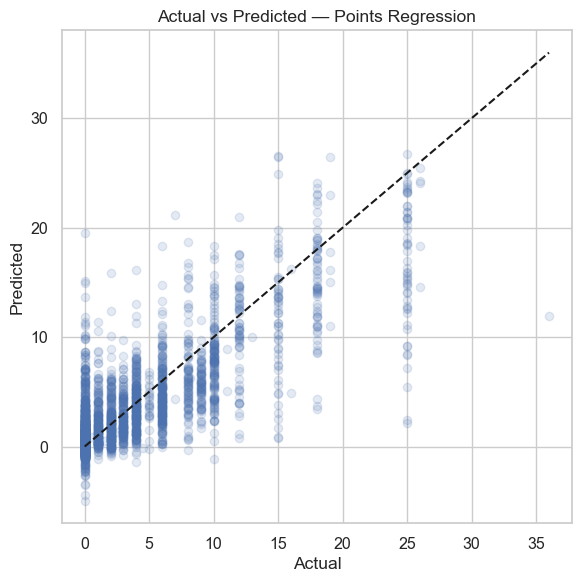

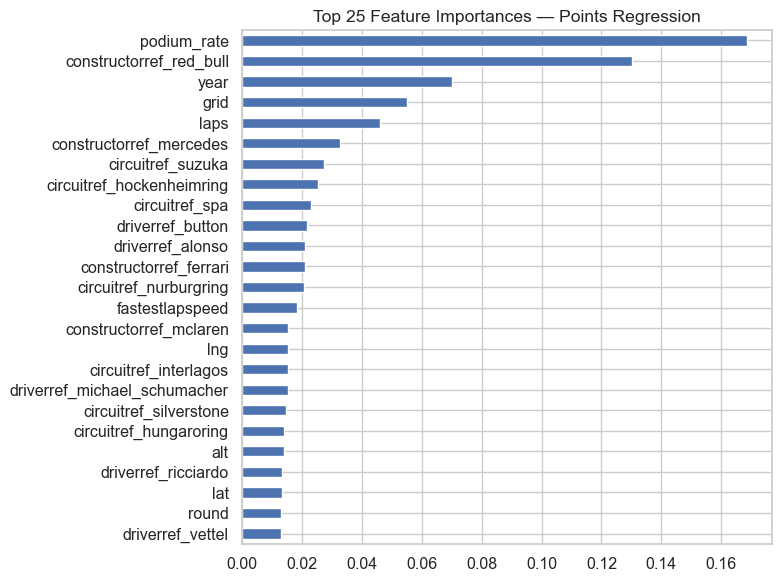

['results/models/points_regression_model.joblib']

In [ ]:
# POINT PREDICTION (Regression)
 
reg_df = data.dropna(subset=['points']).copy()

for c in cat_features:
    reg_df[c] = reduce_topk(reg_df[c].fillna('NA'), k=12)

Xr_num = reg_df[num_features].fillna(0)
Xr_cat = pd.get_dummies(reg_df[cat_features].fillna('NA'), prefix=cat_features, drop_first=True)
Xr = pd.concat([Xr_num, Xr_cat], axis=1)
yr = reg_df['points'].astype(float)

Xtr, Xte, ytr, yte = train_test_split(Xr, yr, test_size=0.2, random_state=42)
model_reg = xgb.XGBRegressor(n_estimators=300, max_depth=6, random_state=42, verbosity=0) if HAS_XGB else RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model_reg.fit(Xtr, ytr)
pred = model_reg.predict(Xte)

rmse = np.sqrt(mean_squared_error(yte, pred))
mae = mean_absolute_error(yte, pred)
r2 = r2_score(yte, pred)
print(f"\n🎯 Points Regression — RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")

plt.figure(figsize=(6,6))
plt.scatter(yte, pred, alpha=0.15)
plt.plot([yte.min(), yte.max()], [yte.min(), yte.max()], 'k--')
plt.title("Actual vs Predicted — Points Regression")
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.tight_layout()
plt.savefig("results/figures/points_regression_scatter.png")
plt.show()

# Feature importance
if hasattr(model_reg, "feature_importances_"):
    imp_reg = pd.Series(model_reg.feature_importances_, index=Xtr.columns).sort_values(ascending=False).head(25)
    imp_reg.to_csv("results/tables/points_feature_importance.csv", index=True)
    plt.figure(figsize=(8,6))
    imp_reg.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Top 25 Feature Importances — Points Regression")
    plt.tight_layout()
    plt.savefig("results/figures/points_regression_importance.png")
    plt.show()

# Save model
joblib.dump(model_reg, "results/models/points_regression_model.joblib")


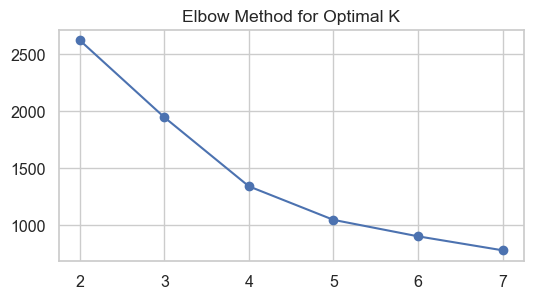

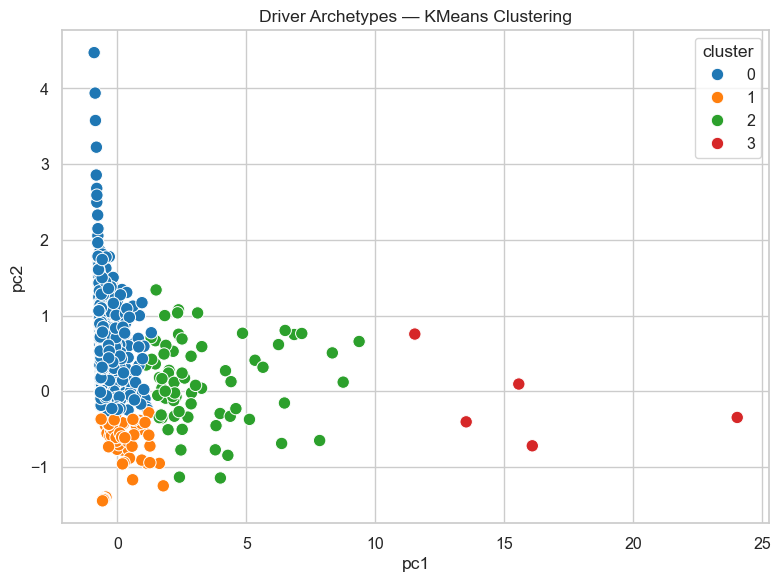

['results/models/driver_scaler.joblib']

In [ ]:
# DRIVER CLUSTERING (KMeans + PCA)

drv = data.groupby('driverref').agg(
    total_points=('points','sum'),
    mean_points=('points','mean'),
    wins=('win','sum'),
    races=('raceid','nunique'),
    avg_finish=('position','mean')
).reset_index().fillna(0)

clust_feats = ['total_points','mean_points','wins','races','avg_finish']
Xc = drv[clust_feats].apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# Optimal k via elbow
inertia = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(Xc_scaled).inertia_ for k in range(2,8)]
plt.figure(figsize=(6,3))
plt.plot(range(2,8), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.savefig("results/figures/clustering_elbow.png")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10).fit(Xc_scaled)
drv['cluster'] = kmeans.labels_

pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(Xc_scaled)
drv['pc1'], drv['pc2'] = proj[:,0], proj[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=drv, x='pc1', y='pc2', hue='cluster', palette='tab10', s=80)
plt.title("Driver Archetypes — KMeans Clustering")
plt.tight_layout()
plt.savefig("results/figures/driver_clusters.png")
plt.show()

drv.to_csv("results/tables/driver_clusters.csv", index=False)
joblib.dump(kmeans, "results/models/driver_kmeans.joblib")
joblib.dump(scaler, "results/models/driver_scaler.joblib")

IsolationForest anomalies: 264
LOF anomalies: 266


C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


,year,raceid,driver_name,constructorref,points,grid,position,anomaly_iso,anomaly_lof
22514,2014,918,Lewis Hamilton,mercedes,50.0,2,1.0,1,0
26140,2023,1114,Max Verstappen,red_bull,26.0,1,1.0,1,0
26160,2023,1115,Max Verstappen,red_bull,26.0,1,1.0,1,0
26000,2023,1107,Max Verstappen,red_bull,26.0,1,1.0,1,0
25960,2023,1105,Max Verstappen,red_bull,26.0,1,1.0,1,0
26020,2023,1108,Max Verstappen,red_bull,26.0,1,1.0,1,0
26040,2023,1109,Max Verstappen,red_bull,26.0,2,1.0,1,0
25660,2022,1087,Max Verstappen,red_bull,26.0,14,1.0,1,0
25680,2022,1088,Max Verstappen,red_bull,26.0,1,1.0,1,0
25380,2021,1073,Max Verstappen,red_bull,26.0,1,1.0,1,0


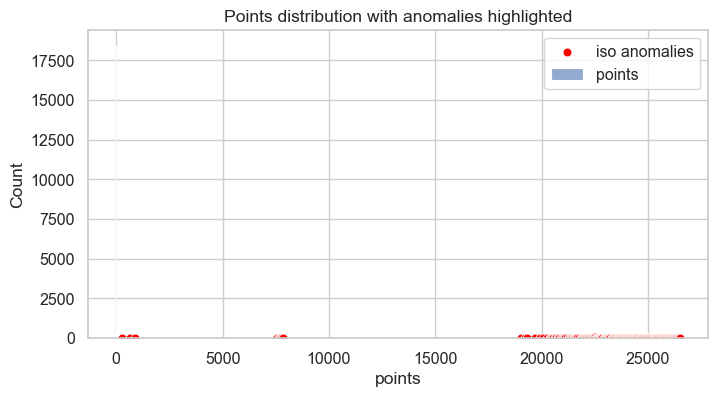


 All ML models, figures, and tables saved successfully in 'results/' folder.


In [ ]:
# ANOMALY DETECTION

anom_feats = [f for f in ['points','grid','position','fastestlapspeed','win_rate','podium_rate'] if f in data.columns]
adf = data[anom_feats].apply(pd.to_numeric, errors='coerce').fillna(0)

# IsolationForest
iso = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
iso.fit(adf)
scores = iso.decision_function(adf)
labels_iso = iso.predict(adf)  # -1 anomaly, 1 normal

data['anomaly_iso'] = (labels_iso == -1).astype(int)
print("IsolationForest anomalies:", data['anomaly_iso'].sum())

# LocalOutlierFactor (unsupervised)
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_labels = lof.fit_predict(adf)
data['anomaly_lof'] = (lof_labels == -1).astype(int)
print("LOF anomalies:", data['anomaly_lof'].sum())

# inspect top anomalies (show driver, race, points, grid, position)
anoms = data[(data['anomaly_iso']==1) | (data['anomaly_lof']==1)].sort_values('points', ascending=False)
display(anoms[['year','raceid','driver_name','constructorref','points','grid','position','anomaly_iso','anomaly_lof']].head(30))

# simple viz: points distribution with anomalies highlighted
plt.figure(figsize=(8,4))
sns.histplot(data['points'].fillna(0), bins=50, label='points', alpha=0.6)
sns.scatterplot(x=data.index[data['anomaly_iso']==1], y=data.loc[data['anomaly_iso']==1,'points'], color='red', s=40, label='iso anomalies')
plt.legend()
plt.title("Points distribution with anomalies highlighted")
plt.show()

joblib.dump(iso, "results/models/isolation_forest.joblib")
print("\n All ML models, figures, and tables saved successfully in 'results/' folder.")

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# === Load processed data ===
df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
df.replace("\\N", np.nan, inplace=True)
df.columns = [c.lower() for c in df.columns]

# === Directory setup ===
os.makedirs("results/visualizations", exist_ok=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_19796\280296554.py:12: DtypeWarning: Columns (4,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
